In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# Create a series of scatterplots to showcase the following relationships:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs Latitude
# Wind Speed (mph) vs. Latitude

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

598

In [4]:
# Perform API Calls
## Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"

city = "east london"
# Build query URL
query_url = f'{url}appid={weather_api_key}&q={city}'       #&id={city_id}'

# get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()


## Include a print log of each city as it'sbeing processed (with the city number and city name).
#cities = ['London','kapaa']
subset_cities = [cities[0],cities[1],cities[2],cities[3],cities[4]]
#city_ids = [117,103, 1,2,3]

In [5]:
# Convert Raw Data to DataFrame
# lat, lon, temp, humidity, cloudiness, windspeed
lon = []
lat = []
temp = [] 
max_temp = []
humidity = []
clouds = []
windspeed = []
city_list = []
city_id_list = []
country_list = []

In [6]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

weather_json

{'coord': {'lon': 27.9116, 'lat': -33.0153},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 295.45,
  'feels_like': 295.71,
  'temp_min': 295.45,
  'temp_max': 295.45,
  'pressure': 1013,
  'humidity': 83,
  'sea_level': 1013,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 4.42, 'deg': 32},
 'clouds': {'all': 59},
 'dt': 1614036851,
 'sys': {'country': 'ZA', 'sunrise': 1614052327, 'sunset': 1614099100},
 'timezone': 7200,
 'id': 1006984,
 'name': 'East London',
 'cod': 200}

In [7]:
for city in cities:   #subset_cities:
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'

    try:
        # get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        city_id_list.append(weather_json['id'])
        lon.append(weather_json['coord']['lon'])
        lat.append(weather_json['coord']['lat'])
        temp.append(weather_json['main']['temp'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed']) 
        #Add the city last after everything else works
        print(f'City is: {city}.')
        city_list.append(weather_json['name'])
        country_list.append(weather_json['sys']['country'])
        print(weather_json)
    except:
        print(f'EXCEPTION: {weather_json} for {city}')
    time.sleep(2)
    

City is: chokurdakh.
{'coord': {'lon': 147.9167, 'lat': 70.6333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -34.26, 'feels_like': -45.53, 'temp_min': -34.26, 'temp_max': -34.26, 'pressure': 1025, 'humidity': 83, 'sea_level': 1025, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 7.45, 'deg': 231}, 'clouds': {'all': 34}, 'dt': 1614036852, 'sys': {'country': 'RU', 'sunrise': 1614031769, 'sunset': 1614062060}, 'timezone': 39600, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
City is: abu dhabi.
{'coord': {'lon': 54.3667, 'lat': 24.4667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.83, 'feels_like': 72.28, 'temp_min': 69.8, 'temp_max': 71.6, 'pressure': 1016, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1614036854, 'sys': {'type': 1, 'id': 7533, 'count

EXCEPTION: {'cod': '404', 'message': 'city not found'} for barentsburg
City is: pangnirtung.
{'coord': {'lon': -65.7125, 'lat': 66.1451}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 1.4, 'feels_like': -6.45, 'temp_min': 1.4, 'temp_max': 1.4, 'pressure': 994, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 2.08, 'deg': 133}, 'snow': {'1h': 0.12}, 'clouds': {'all': 90}, 'dt': 1614036891, 'sys': {'type': 1, 'id': 968, 'country': 'CA', 'sunrise': 1613995319, 'sunset': 1614028259}, 'timezone': -18000, 'id': 6096551, 'name': 'Pangnirtung', 'cod': 200}
City is: vila velha.
{'coord': {'lon': -40.2925, 'lat': -20.3297}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.88, 'feels_like': 87.21, 'temp_min': 77, 'temp_max': 84, 'pressure': 1014, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 150}, 'clouds': {'a

City is: ilulissat.
{'coord': {'lon': -51.1, 'lat': 69.2167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.8, 'feels_like': 5.61, 'temp_min': 24.8, 'temp_max': 24.8, 'pressure': 994, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 23.02, 'deg': 130}, 'clouds': {'all': 60}, 'dt': 1614036927, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 1613992738, 'sunset': 1614023826}, 'timezone': -10800, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
City is: la palma.
{'coord': {'lon': -118.0467, 'lat': 33.8464}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 79.3, 'feels_like': 70.2, 'temp_min': 73, 'temp_max': 84.2, 'pressure': 1018, 'humidity': 13}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 260}, 'clouds': {'all': 1}, 'dt': 1614036929, 'sys': {'type': 1, 'id': 5860, 'country': 'US', 'sunrise': 1614004133, '

City is: yulara.
{'coord': {'lon': 130.9889, 'lat': -25.2406}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 65.25, 'temp_min': 77, 'temp_max': 77, 'pressure': 1017, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 18.41, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1614036964, 'sys': {'type': 1, 'id': 9487, 'country': 'AU', 'sunrise': 1614028021, 'sunset': 1614073932}, 'timezone': 34200, 'id': 6355222, 'name': 'Yulara', 'cod': 200}
City is: chuy.
{'coord': {'lon': -53.4616, 'lat': -33.6971}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.98, 'feels_like': 74.05, 'temp_min': 73.98, 'temp_max': 73.98, 'pressure': 1010, 'humidity': 74, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 9.37, 'deg': 31, 'gust': 16.17}, 'clouds': {'all': 50}, 'dt': 1614036966, 'sys': {'country': '

City is: mar del plata.
{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.79, 'feels_like': 60.46, 'temp_min': 64.99, 'temp_max': 66.2, 'pressure': 1010, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 200}, 'clouds': {'all': 0}, 'dt': 1614037000, 'sys': {'type': 1, 'id': 8305, 'country': 'AR', 'sunrise': 1613986060, 'sunset': 1614033604}, 'timezone': -10800, 'id': 3430863, 'name': 'Mar del Plata', 'cod': 200}
City is: erseke.
{'coord': {'lon': 20.6789, 'lat': 40.3378}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 36.23, 'feels_like': 30.04, 'temp_min': 36.23, 'temp_max': 36.23, 'pressure': 1031, 'humidity': 60, 'sea_level': 1031, 'grnd_level': 910}, 'visibility': 10000, 'wind': {'speed': 2.8, 'deg': 32, 'gust': 3.69}, 'clouds': {'all': 0}, 'dt': 1614037002, 'sys': {'c

City is: kodiak.
{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23, 'feels_like': 11.86, 'temp_min': 23, 'temp_max': 23, 'pressure': 1014, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 280, 'gust': 27.63}, 'clouds': {'all': 1}, 'dt': 1614037037, 'sys': {'type': 1, 'id': 7668, 'country': 'US', 'sunrise': 1614014486, 'sunset': 1614050701}, 'timezone': -32400, 'id': 5866583, 'name': 'Saint Paul Harbor', 'cod': 200}
City is: touros.
{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 83.23, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1012, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1614037039, 'sys': {'type': 1, 'id': 8452, 'country': 'BR', 'su

EXCEPTION: {'cod': '404', 'message': 'city not found'} for umm durman
City is: saint george.
{'coord': {'lon': -113.5841, 'lat': 37.1041}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 56.86, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1025, 'humidity': 17}, 'visibility': 10000, 'wind': {'speed': 0.87, 'deg': 69, 'gust': 2.84}, 'clouds': {'all': 1}, 'dt': 1614037072, 'sys': {'type': 1, 'id': 5832, 'country': 'US', 'sunrise': 1614003262, 'sunset': 1614043292}, 'timezone': -25200, 'id': 5546220, 'name': 'Saint George', 'cod': 200}
EXCEPTION: {'cod': '404', 'message': 'city not found'} for tsihombe
EXCEPTION: {'cod': '404', 'message': 'city not found'} for bur gabo
City is: port augusta.
{'coord': {'lon': 137.7667, 'lat': -32.5}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 63.12, 'feels_like': 53.11, 'temp_

City is: iqaluit.
{'coord': {'lon': -68.5145, 'lat': 63.7506}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 6.4, 'feels_like': -3.1, 'temp_min': 6.01, 'temp_max': 6.8, 'pressure': 993, 'humidity': 78}, 'visibility': 6437, 'wind': {'speed': 5.75, 'deg': 260}, 'clouds': {'all': 90}, 'dt': 1614037112, 'sys': {'type': 1, 'id': 797, 'country': 'CA', 'sunrise': 1613995429, 'sunset': 1614029494}, 'timezone': -18000, 'id': 5983720, 'name': 'Iqaluit', 'cod': 200}
City is: popovo.
{'coord': {'lon': 26.2333, 'lat': 43.35}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 22.39, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 1029, 'humidity': 100}, 'visibility': 3900, 'wind': {'speed': 3.44, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1614037114, 'sys': {'type': 1, 'id': 6361, 'country': 'BG', 'sunrise': 1614056482, 'sunset': 1614095750}

EXCEPTION: {'cod': '404', 'message': 'city not found'} for nizhneyansk
City is: shihezi.
{'coord': {'lon': 86.0333, 'lat': 44.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.67, 'feels_like': 22.77, 'temp_min': 28.67, 'temp_max': 28.67, 'pressure': 1027, 'humidity': 98, 'sea_level': 1027, 'grnd_level': 968}, 'visibility': 3296, 'wind': {'speed': 3.22, 'deg': 72}, 'clouds': {'all': 100}, 'dt': 1614037146, 'sys': {'country': 'CN', 'sunrise': 1614042218, 'sunset': 1614081313}, 'timezone': 28800, 'id': 1529195, 'name': 'Shihezi', 'cod': 200}
City is: college.
{'coord': {'lon': -147.8028, 'lat': 64.8569}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -12.57, 'feels_like': -20.25, 'temp_min': -14.8, 'temp_max': -9, 'pressure': 1014, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 1.41, 'deg': 180, 'gust': 5.26}, 'cl

City is: takoradi.
{'coord': {'lon': -1.7554, 'lat': 4.8845}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.44, 'feels_like': 85.66, 'temp_min': 80.44, 'temp_max': 80.44, 'pressure': 1012, 'humidity': 81, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.16, 'deg': 211}, 'clouds': {'all': 0}, 'dt': 1614037179, 'sys': {'country': 'GH', 'sunrise': 1613974847, 'sunset': 1614018034}, 'timezone': 0, 'id': 2294915, 'name': 'Takoradze', 'cod': 200}
City is: mazyr.
{'coord': {'lon': 29.2456, 'lat': 52.0495}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.24, 'feels_like': 28.02, 'temp_min': 33.24, 'temp_max': 33.24, 'pressure': 1030, 'humidity': 98, 'sea_level': 1030, 'grnd_level': 1011}, 'visibility': 8694, 'wind': {'speed': 3.13, 'deg': 27, 'gust': 4.14}, 'clouds': {'all': 100}, 'dt': 1614037181, '

City is: chiang khong.
{'coord': {'lon': 100.4046, 'lat': 20.2613}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 68.54, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1012, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 1.57, 'deg': 37}, 'clouds': {'all': 0}, 'dt': 1614037212, 'sys': {'type': 1, 'id': 9256, 'country': 'TH', 'sunrise': 1614037383, 'sunset': 1614079250}, 'timezone': 25200, 'id': 1611197, 'name': 'Chiang Khong', 'cod': 200}
City is: gayeri.
{'coord': {'lon': 0.4931, 'lat': 12.6497}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.31, 'feels_like': 61.18, 'temp_min': 71.31, 'temp_max': 71.31, 'pressure': 1013, 'humidity': 12, 'sea_level': 1013, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 8.5, 'deg': 53, 'gust': 10.87}, 'clouds': {'all': 0}, 'dt': 1614037214, 'sys': {'country

City is: mujiayingzi.
{'coord': {'lon': 118.7833, 'lat': 42.1167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.67, 'feels_like': 11.52, 'temp_min': 17.67, 'temp_max': 17.67, 'pressure': 1033, 'humidity': 67, 'sea_level': 1033, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 89}, 'clouds': {'all': 80}, 'dt': 1614037247, 'sys': {'country': 'CN', 'sunrise': 1614034203, 'sunset': 1614073609}, 'timezone': 28800, 'id': 2035707, 'name': 'Mujiayingzi', 'cod': 200}
City is: assiniboia.
{'coord': {'lon': -105.9845, 'lat': 49.6334}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 35.6, 'feels_like': 18.77, 'temp_min': 35.6, 'temp_max': 35.6, 'pressure': 1008, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 21.85, 'deg': 280, 'gust': 27.63}, 'clouds': {'all': 17}, 'dt': 1614037249, 'sys': {'type': 1, 'id'

EXCEPTION: {'cod': '404', 'message': 'city not found'} for temaraia
City is: sitka.
{'coord': {'lon': -135.33, 'lat': 57.0531}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 39.2, 'feels_like': 30.07, 'temp_min': 39.2, 'temp_max': 39.2, 'pressure': 1005, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 250}, 'rain': {'1h': 0.25}, 'clouds': {'all': 40}, 'dt': 1614037284, 'sys': {'type': 1, 'id': 7795, 'country': 'US', 'sunrise': 1614010292, 'sunset': 1614046699}, 'timezone': -32400, 'id': 5557293, 'name': 'Sitka', 'cod': 200}
City is: sisimiut.
{'coord': {'lon': -53.6735, 'lat': 66.9395}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.96, 'feels_like': 7.47, 'temp_min': 17.96, 'temp_max': 17.96, 'pressure': 996, 'humidity': 90, 'sea_level': 996, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 9.06

City is: khatanga.
{'coord': {'lon': 102.5, 'lat': 71.9667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -29.56, 'feels_like': -41.24, 'temp_min': -29.56, 'temp_max': -29.56, 'pressure': 1027, 'humidity': 97, 'sea_level': 1027, 'grnd_level': 1023}, 'visibility': 3187, 'wind': {'speed': 8.3, 'deg': 210, 'gust': 12.75}, 'clouds': {'all': 99}, 'dt': 1614037316, 'sys': {'country': 'RU', 'sunrise': 1614043196, 'sunset': 1614072432}, 'timezone': 25200, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
City is: pathalgaon.
{'coord': {'lon': 83.4667, 'lat': 22.5667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.71, 'feels_like': 55.53, 'temp_min': 60.71, 'temp_max': 60.71, 'pressure': 1013, 'humidity': 32, 'sea_level': 1013, 'grnd_level': 949}, 'visibility': 10000, 'wind': {'speed': 2.53, 'deg': 24}, 'clouds': {'all': 76}, 'dt'

City is: charters towers.
{'coord': {'lon': 146.2667, 'lat': -20.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 88.23, 'feels_like': 90.01, 'temp_min': 88.23, 'temp_max': 88.23, 'pressure': 1008, 'humidity': 45, 'sea_level': 1008, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 5.59, 'deg': 325, 'gust': 5.53}, 'clouds': {'all': 0}, 'dt': 1614037356, 'sys': {'country': 'AU', 'sunrise': 1614024616, 'sunset': 1614070006}, 'timezone': 36000, 'id': 2171722, 'name': 'Charters Towers', 'cod': 200}
City is: zhanakorgan.
{'coord': {'lon': 67.2495, 'lat': 43.9098}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 33.76, 'feels_like': 26.24, 'temp_min': 33.76, 'temp_max': 33.76, 'pressure': 1019, 'humidity': 75, 'sea_level': 1019, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 5.77, 'deg': 143}, 'snow': {'1h': 1.5984}, 'clouds':

City is: hervey bay.
{'coord': {'lon': 152.8535, 'lat': -25.2986}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 90.43, 'feels_like': 99.05, 'temp_min': 86, 'temp_max': 91.99, 'pressure': 1008, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 170}, 'clouds': {'all': 2}, 'dt': 1614037393, 'sys': {'type': 1, 'id': 9501, 'country': 'AU', 'sunrise': 1614022769, 'sunset': 1614068691}, 'timezone': 36000, 'id': 2146219, 'name': 'Hervey Bay', 'cod': 200}
City is: beira.
{'coord': {'lon': 34.8389, 'lat': -19.8436}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 89.28, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1014, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 150}, 'rain': {'1h': 2.22}, 'clouds': {'all': 90}, 'dt': 1614037395, 'sys': {'type': 1, 'id': 2194, 'country': 'MZ

City is: ola.
{'coord': {'lon': 151.2833, 'lat': 59.5833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.87, 'feels_like': -10.5, 'temp_min': 1.87, 'temp_max': 1.87, 'pressure': 1015, 'humidity': 65, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 10.31, 'deg': 31, 'gust': 14.56}, 'clouds': {'all': 58}, 'dt': 1614037428, 'sys': {'country': 'RU', 'sunrise': 1614028244, 'sunset': 1614063970}, 'timezone': 39600, 'id': 2122574, 'name': 'Ola', 'cod': 200}
City is: mount darwin.
{'coord': {'lon': 31.5838, 'lat': -16.7725}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 68.2, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1014, 'humidity': 95, 'sea_level': 1014, 'grnd_level': 909}, 'visibility': 10000, 'wind': {'speed': 5.64, 'deg': 123}, 'clouds': {'all': 100}, 'dt': 161403743

City is: byron bay.
{'coord': {'lon': 153.6167, 'lat': -28.65}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 81.79, 'feels_like': 84.34, 'temp_min': 81, 'temp_max': 82.4, 'pressure': 1009, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1614037405, 'sys': {'type': 1, 'id': 9496, 'country': 'AU', 'sunrise': 1614022401, 'sunset': 1614068693}, 'timezone': 39600, 'id': 2172880, 'name': 'Byron Bay', 'cod': 200}
City is: mataram.
{'coord': {'lon': 116.1167, 'lat': -8.5833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 84.2, 'temp_min': 77, 'temp_max': 77, 'pressure': 1008, 'humidity': 94}, 'visibility': 8000, 'wind': {'speed': 5.75, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1614037465, 'sys': {'type': 1, 'id': 9337, 'country': 'ID', 'sunrise': 1614032380

City is: sioux lookout.
{'coord': {'lon': -91.917, 'lat': 50.1001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.2, 'feels_like': 27.36, 'temp_min': 39.2, 'temp_max': 39.2, 'pressure': 985, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 290, 'gust': 25.32}, 'clouds': {'all': 90}, 'dt': 1614037507, 'sys': {'type': 1, 'id': 979, 'country': 'CA', 'sunrise': 1613999085, 'sunset': 1614037070}, 'timezone': -21600, 'id': 6148373, 'name': 'Sioux Lookout', 'cod': 200}
City is: boralday.
{'coord': {'lon': 76.8594, 'lat': 43.3578}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 23.61, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 1018, 'humidity': 93}, 'visibility': 50, 'wind': {'speed': 4.47, 'deg': 240}, 'snow': {'1h': 0.18}, 

City is: pucallpa.
{'coord': {'lon': -74.5539, 'lat': -8.3791}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 89.82, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1009, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 340}, 'clouds': {'all': 40}, 'dt': 1614037540, 'sys': {'type': 1, 'id': 8675, 'country': 'PE', 'sunrise': 1613991747, 'sunset': 1614036074}, 'timezone': -18000, 'id': 3693345, 'name': 'Pucallpa', 'cod': 200}
City is: motygino.
{'coord': {'lon': 94.7592, 'lat': 58.1831}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -15.32, 'feels_like': -24.39, 'temp_min': -15.32, 'temp_max': -15.32, 'pressure': 1028, 'humidity': 89, 'sea_level': 1028, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.98, 'deg': 240}, 'clouds': {'all': 93}, 'dt': 1614037542, 'sys': {'co

City is: bathsheba.
{'coord': {'lon': -59.5167, 'lat': 13.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77, 'feels_like': 69.69, 'temp_min': 77, 'temp_max': 77, 'pressure': 1015, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 21.85, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1614037573, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1613989067, 'sunset': 1614031537}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
City is: ongandjera.
{'coord': {'lon': 15.0667, 'lat': -17.8833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.83, 'feels_like': 66.72, 'temp_min': 70.83, 'temp_max': 70.83, 'pressure': 1015, 'humidity': 45, 'sea_level': 1015, 'grnd_level': 894}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 196}, 'clouds': {'all': 34}, 'dt': 1614037575, 'sys': {'country

City is: norman wells.
{'coord': {'lon': -126.8329, 'lat': 65.282}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -14.8, 'feels_like': -22.99, 'temp_min': -14.8, 'temp_max': -14.8, 'pressure': 1005, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1614037606, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1614009736, 'sunset': 1614043176}, 'timezone': -25200, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
City is: berlevag.
{'coord': {'lon': 29.0864, 'lat': 70.8578}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.53, 'feels_like': -15.74, 'temp_min': 10.53, 'temp_max': 10.53, 'pressure': 1020, 'humidity': 95, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 7639, 'wind': {'speed': 36.28, 'deg': 210}, 'clouds': {'all': 86}, 'dt': 1614037608, 'sys': {'cou

City is: coihaique.
{'coord': {'lon': -72.0662, 'lat': -45.5752}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 48.16, 'temp_min': 55.4, 'temp_max': 55.4, 'pressure': 1018, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 260, 'gust': 20.71}, 'clouds': {'all': 40}, 'dt': 1614037640, 'sys': {'type': 1, 'id': 8491, 'country': 'CL', 'sunrise': 1613988920, 'sunset': 1614037707}, 'timezone': -10800, 'id': 3894426, 'name': 'Coyhaique', 'cod': 200}
City is: mumford.
{'coord': {'lon': -0.759, 'lat': 5.2618}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.74, 'feels_like': 86.14, 'temp_min': 80.74, 'temp_max': 80.74, 'pressure': 1012, 'humidity': 82, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.52, 'deg': 211, 'gust': 13.24}, 'clouds': {'all': 0}, 'dt': 16140

City is: somerset east.
{'coord': {'lon': 25.588, 'lat': -32.7217}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.04, 'feels_like': 63.91, 'temp_min': 62.04, 'temp_max': 62.04, 'pressure': 1014, 'humidity': 84, 'sea_level': 1014, 'grnd_level': 930}, 'visibility': 10000, 'wind': {'speed': 0.67, 'deg': 40, 'gust': 1.54}, 'clouds': {'all': 0}, 'dt': 1614037673, 'sys': {'country': 'ZA', 'sunrise': 1614052903, 'sunset': 1614099639}, 'timezone': 7200, 'id': 954161, 'name': 'Somerset East', 'cod': 200}
City is: chifeng.
{'coord': {'lon': 118.9636, 'lat': 42.2683}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 17.28, 'feels_like': 10.11, 'temp_min': 17.28, 'temp_max': 17.28, 'pressure': 1033, 'humidity': 34, 'sea_level': 1033, 'grnd_level': 961}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 112, 'gust': 1.5}, 'clouds': {'all

City is: baykit.
{'coord': {'lon': 96.37, 'lat': 61.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -13.94, 'feels_like': -21.26, 'temp_min': -13.94, 'temp_max': -13.94, 'pressure': 1025, 'humidity': 84, 'sea_level': 1025, 'grnd_level': 1004}, 'visibility': 1971, 'wind': {'speed': 0.89, 'deg': 72}, 'clouds': {'all': 100}, 'dt': 1614037708, 'sys': {'country': 'RU', 'sunrise': 1614041746, 'sunset': 1614076823}, 'timezone': 25200, 'id': 1510689, 'name': 'Baykit', 'cod': 200}
City is: lao cai.
{'coord': {'lon': 103.95, 'lat': 22.4833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.51, 'feels_like': 69.42, 'temp_min': 66.51, 'temp_max': 66.51, 'pressure': 1016, 'humidity': 80, 'sea_level': 1016, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 0.74, 'deg': 77}, 'clouds': {'all': 73}, 'dt': 1614037710, 'sys': {'c

City is: pandan.
{'coord': {'lon': 124.1694, 'lat': 14.0453}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.29, 'feels_like': 87.57, 'temp_min': 80.29, 'temp_max': 80.29, 'pressure': 1010, 'humidity': 85, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.84, 'deg': 133}, 'clouds': {'all': 89}, 'dt': 1614037741, 'sys': {'country': 'PH', 'sunrise': 1614031404, 'sunset': 1614073823}, 'timezone': 28800, 'id': 1695546, 'name': 'Pandan', 'cod': 200}
EXCEPTION: {'cod': '404', 'message': 'city not found'} for kuche
City is: morant bay.
{'coord': {'lon': -76.4093, 'lat': 17.8815}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 77.47, 'feels_like': 73.69, 'temp_min': 75, 'temp_max': 80.6, 'pressure': 1015, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 140}, 'clouds': {'all'

EXCEPTION: {'cod': '404', 'message': 'city not found'} for marcona
City is: balkanabat.
{'coord': {'lon': 54.3671, 'lat': 39.5108}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 40.68, 'feels_like': 32.72, 'temp_min': 40.68, 'temp_max': 40.68, 'pressure': 1022, 'humidity': 82, 'sea_level': 1022, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 8.77, 'deg': 269, 'gust': 13.15}, 'clouds': {'all': 36}, 'dt': 1614037780, 'sys': {'country': 'TM', 'sunrise': 1614049467, 'sunset': 1614089262}, 'timezone': 18000, 'id': 161616, 'name': 'Balkanabat', 'cod': 200}
City is: gore.
{'coord': {'lon': 168.9436, 'lat': -46.1028}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.99, 'feels_like': 66.07, 'temp_min': 66.99, 'temp_max': 66.99, 'pressure': 1007, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 5

City is: cestas.
{'coord': {'lon': -0.6791, 'lat': 44.7435}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 43.07, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 1026, 'humidity': 93}, 'visibility': 1500, 'wind': {'speed': 3.65, 'deg': 196, 'gust': 5.21}, 'clouds': {'all': 52}, 'dt': 1614037818, 'sys': {'type': 1, 'id': 6450, 'country': 'FR', 'sunrise': 1614063040, 'sunset': 1614102109}, 'timezone': 3600, 'id': 3027763, 'name': 'Cestas', 'cod': 200}
City is: domoni.
{'coord': {'lon': 44.5319, 'lat': -12.2569}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.59, 'feels_like': 86.05, 'temp_min': 79.59, 'temp_max': 79.59, 'pressure': 1008, 'humidity': 78, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.03, 'deg': 261}, 'rain': {'1h': 0.43}, 'clouds': {'all': 73}, 'dt': 1614037820, 'sys': {'co

City is: erzin.
{'coord': {'lon': 36.2, 'lat': 36.9559}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46, 'feels_like': 38.44, 'temp_min': 46, 'temp_max': 46, 'pressure': 1024, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 5.99, 'deg': 0, 'gust': 10}, 'clouds': {'all': 0}, 'dt': 1614037851, 'sys': {'type': 3, 'id': 2007718, 'country': 'TR', 'sunrise': 1614053659, 'sunset': 1614093789}, 'timezone': 10800, 'id': 296852, 'name': 'Erzin', 'cod': 200}
City is: alvaraes.
{'coord': {'lon': -64.8042, 'lat': -3.2208}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 93.79, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1008, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 130}, 'rain': {'1h': 2.15}, 'clouds': {'all': 40}, 'dt': 1614037853, 'sys': {'type': 1, 'id': 8438, 'country': 'BR', 'sun

City is: avera.
{'coord': {'lon': -82.5271, 'lat': 33.194}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.44, 'feels_like': 55.98, 'temp_min': 55, 'temp_max': 59, 'pressure': 1016, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1614037886, 'sys': {'type': 1, 'id': 2827, 'country': 'US', 'sunrise': 1613995576, 'sunset': 1614036072}, 'timezone': -18000, 'id': 4231997, 'name': 'Avera', 'cod': 200}
City is: helena.
{'coord': {'lon': -112.0361, 'lat': 46.5927}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 42.6, 'feels_like': 32.29, 'temp_min': 41, 'temp_max': 44.6, 'pressure': 1013, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 290}, 'clouds': {'all': 1}, 'dt': 1614037888, 'sys': {'type': 1, 'id': 4381, 'country': 'US', 'sunrise': 1614003586, 'sunset':

City is: oussouye.
{'coord': {'lon': -16.5469, 'lat': 12.485}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.15, 'feels_like': 77.34, 'temp_min': 71.6, 'temp_max': 78.8, 'pressure': 1011, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1614037921, 'sys': {'type': 1, 'id': 2413, 'country': 'SN', 'sunrise': 1613978725, 'sunset': 1614021255}, 'timezone': 0, 'id': 2246901, 'name': 'Oussouye', 'cod': 200}
City is: lorengau.
{'coord': {'lon': 147.2712, 'lat': -2.0226}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.17, 'feels_like': 88.56, 'temp_min': 82.17, 'temp_max': 82.17, 'pressure': 1009, 'humidity': 78, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 7199, 'wind': {'speed': 6.62, 'deg': 55, 'gust': 8.57}, 'rain': {'1h': 4.211}, 'clouds': {'all': 100}, 'dt': 1

City is: pudozh.
{'coord': {'lon': 36.5345, 'lat': 61.8099}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -18.58, 'feels_like': -27.26, 'temp_min': -18.58, 'temp_max': -18.58, 'pressure': 1047, 'humidity': 85, 'sea_level': 1047, 'grnd_level': 1038}, 'visibility': 10000, 'wind': {'speed': 3.18, 'deg': 116}, 'clouds': {'all': 0}, 'dt': 1614037960, 'sys': {'country': 'RU', 'sunrise': 1614056101, 'sunset': 1614091186}, 'timezone': 10800, 'id': 504269, 'name': 'Pudozh', 'cod': 200}
City is: lasa.
{'coord': {'lon': 10.7002, 'lat': 46.6166}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 35.24, 'feels_like': 27.45, 'temp_min': 30.2, 'temp_max': 39, 'pressure': 1033, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1614037963, 'sys': {'type': 1, 'id': 6813, 'country': 'IT', 'sunrise': 16140

City is: aqtobe.
{'coord': {'lon': 57.2072, 'lat': 50.2797}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -2.2, 'feels_like': -16.38, 'temp_min': -2.2, 'temp_max': -2.2, 'pressure': 1000, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 13.42, 'deg': 10}, 'snow': {'1h': 0.59}, 'clouds': {'all': 75}, 'dt': 1614037996, 'sys': {'type': 1, 'id': 8837, 'country': 'KZ', 'sunrise': 1614049643, 'sunset': 1614087722}, 'timezone': 18000, 'id': 610611, 'name': 'Aktobe', 'cod': 200}
City is: dubovka.
{'coord': {'lon': 44.829, 'lat': 49.0583}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 3.2, 'feels_like': -8.16, 'temp_min': 3.2, 'temp_max': 3.2, 'pressure': 1024, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1614037998, 'sys': {'type': 1, 'id': 8973, 'country': 'RU', 'sunrise': 1614052495

City is: mishan.
{'coord': {'lon': 131.8833, 'lat': 45.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -1.01, 'feels_like': -17.97, 'temp_min': -1.01, 'temp_max': -1.01, 'pressure': 1023, 'humidity': 87, 'sea_level': 1023, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 18.66, 'deg': 305}, 'clouds': {'all': 5}, 'dt': 1614038033, 'sys': {'country': 'CN', 'sunrise': 1614031326, 'sunset': 1614070199}, 'timezone': 28800, 'id': 2035746, 'name': 'Mishan', 'cod': 200}
City is: loralai.
{'coord': {'lon': 68.598, 'lat': 30.3705}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 54.12, 'feels_like': 45.9, 'temp_min': 54.12, 'temp_max': 54.12, 'pressure': 1014, 'humidity': 53, 'sea_level': 1014, 'grnd_level': 856}, 'visibility': 10000, 'wind': {'speed': 9.8, 'deg': 325, 'gust': 15.21}, 'clouds': {'all': 46}, 'dt': 1614038035,

City is: tshikapa.
{'coord': {'lon': 20.8, 'lat': -6.4167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 70.38, 'feels_like': 75.49, 'temp_min': 70.38, 'temp_max': 70.38, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 958}, 'visibility': 10000, 'wind': {'speed': 3.76, 'deg': 220, 'gust': 13.76}, 'rain': {'1h': 0.11}, 'clouds': {'all': 100}, 'dt': 1614038070, 'sys': {'country': 'CD', 'sunrise': 1614055350, 'sunset': 1614099490}, 'timezone': 7200, 'id': 204953, 'name': 'Tshikapa', 'cod': 200}
City is: kota kinabalu.
{'coord': {'lon': 116.0724, 'lat': 5.9749}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 74.16, 'feels_like': 80.04, 'temp_min': 73, 'temp_max': 75.2, 'pressure': 1010, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1614037981, 'sys': {'type': 1

City is: teya.
{'coord': {'lon': 92.6267, 'lat': 60.3778}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -13.43, 'feels_like': -22.41, 'temp_min': -13.43, 'temp_max': -13.43, 'pressure': 1026, 'humidity': 86, 'sea_level': 1026, 'grnd_level': 998}, 'visibility': 2122, 'wind': {'speed': 3.87, 'deg': 207}, 'clouds': {'all': 99}, 'dt': 1614038110, 'sys': {'country': 'RU', 'sunrise': 1614042421, 'sunset': 1614077945}, 'timezone': 25200, 'id': 1489656, 'name': 'Teya', 'cod': 200}
City is: palmer.
{'coord': {'lon': -72.3287, 'lat': 42.1584}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}, {'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 34.14, 'feels_like': 25.9, 'temp_min': 32, 'temp_max': 37, 'pressure': 1004, 'humidity': 100}, 'visibi

City is: dali.
{'coord': {'lon': 100.1833, 'lat': 25.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 43.45, 'feels_like': 39.52, 'temp_min': 43.45, 'temp_max': 43.45, 'pressure': 1018, 'humidity': 70, 'sea_level': 1018, 'grnd_level': 804}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 301, 'gust': 2.39}, 'clouds': {'all': 0}, 'dt': 1614038143, 'sys': {'country': 'CN', 'sunrise': 1614037695, 'sunset': 1614079044}, 'timezone': 28800, 'id': 1814093, 'name': 'Dali', 'cod': 200}
City is: aguimes.
{'coord': {'lon': -15.4461, 'lat': 27.9054}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 63.73, 'feels_like': 59.31, 'temp_min': 61, 'temp_max': 64.99, 'pressure': 1024, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 360}, 'clouds': {'all': 20}, 'dt': 1614038145, 'sys': {'type': 1, 'id': 2378, 'country': 'ES', 's

In [8]:
    
wx_dict = {'City':city_list,
          'Country': country_list,
          'City ID': city_id_list,
          'lon':lon,
          'lat':lat,
          'temperature':temp,
          'max temperature':max_temp,
          'humidity':humidity,
          'clouds':clouds,
          'windspeed':windspeed}

print(f'City: {city_list} & ID: {city_id_list} & lon: {lon} & lat: {lat}')
wx_df = pd.DataFrame(wx_dict)
wx_df

City: ['Chokurdakh', 'Abu Dhabi', 'Vaini', 'Forsytheganj', 'Ushuaia', 'Mayumba', 'Rikitea', 'Jamestown', 'Pochutla', 'Bluff', 'Nishihara', 'Albany', 'San Cristobal', 'Yellowknife', 'Mataura', 'Pangnirtung', 'Vila Velha', 'Beïnamar', 'Quang Ngai', 'Ribeira Grande', 'Tukums', 'Thompson', 'Nuuk', 'Puerto Ayora', "Arrondissement d'Ajaccio", 'Isangel', 'Houston', 'Hermanus', 'Troitskoye', 'Inhambane', 'Ilulissat', 'La Palma', 'Padang', 'Lokosovo', 'Kruisfontein', 'Punta Arenas', 'Vicuña', 'Renqiu', 'Cabo San Lucas', 'Qaanaaq', 'Katsuura', 'Hithadhoo', 'Carnarvon', 'Urcos', 'Nanortalik', 'Yulara', 'Chui', 'Port Elizabeth', 'Cape Town', 'New Norfolk', "Mezen'", 'Atuona', 'Tiksi', 'Kulu', 'Nelson Bay', 'Bredasdorp', 'Waitati', 'Okhotsk', 'Leningradskiy', 'Dolisie', 'Mar del Plata', 'Ersekë', 'Port Alfred', 'Busselton', 'Khani', 'Coquimbo', 'Beni', 'Boyolangu', 'Diapaga', 'Mossamedes', 'Ambon City', 'Lashio', 'Kushima', 'Kropotkin', 'Ndélé', 'Saint Paul Harbor', 'Touros', 'Dārāb', 'Balkhash', '

,City,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
0,Chokurdakh,RU,2126123,147.9167,70.6333,-34.26,-34.26,83,34,7.45
1,Abu Dhabi,AE,292968,54.3667,24.4667,70.83,71.60,78,0,5.75
2,Vaini,TO,4032243,-175.2000,-21.2000,82.40,82.40,69,20,12.66
3,Forsytheganj,BY,10722858,29.7333,52.6333,33.48,33.48,97,100,2.21
4,Ushuaia,AR,3833367,-68.3000,-54.8000,42.80,42.80,87,75,31.07
...,...,...,...,...,...,...,...,...,...,...
547,San Rafael,AR,3836669,-68.3301,-34.6177,73.09,73.09,29,0,5.64
548,Ifanadiana,MG,1064366,47.6333,-21.3000,69.57,69.57,93,27,1.16
549,Santa Cruz de la Sierra,BO,3904906,-63.1667,-17.8000,79.92,80.60,83,75,8.05
550,Vestmannaeyjar,IS,3412093,-20.2734,63.4427,38.70,38.70,80,70,11.36


In [9]:
## Export the city data into a .csv.
wx_df.to_csv("../output_data/cities_weather.csv", index=False, header=True)

## Display the DataFrame
wx_df = wx_df.set_index('City')
wx_df

,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
City,,,,,,,,,
Chokurdakh,RU,2126123,147.9167,70.6333,-34.26,-34.26,83,34,7.45
Abu Dhabi,AE,292968,54.3667,24.4667,70.83,71.60,78,0,5.75
Vaini,TO,4032243,-175.2000,-21.2000,82.40,82.40,69,20,12.66
Forsytheganj,BY,10722858,29.7333,52.6333,33.48,33.48,97,100,2.21
Ushuaia,AR,3833367,-68.3000,-54.8000,42.80,42.80,87,75,31.07
...,...,...,...,...,...,...,...,...,...
San Rafael,AR,3836669,-68.3301,-34.6177,73.09,73.09,29,0,5.64
Ifanadiana,MG,1064366,47.6333,-21.3000,69.57,69.57,93,27,1.16
Santa Cruz de la Sierra,BO,3904906,-63.1667,-17.8000,79.92,80.60,83,75,8.05


In [10]:
# Plotting the Data
## Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

today = date.today()

# Textual month, day and year	
today = today.strftime("%B %d, %Y")
print("today", today)


today February 22, 2021


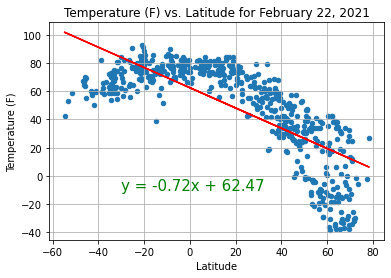

In [21]:
# Create a series of scatterplots to showcase the following relationships:

# Temperature (F) vs. Latitude
# This is not needed, obtained Temp in F from the API
# convert temperature from Kelvin to Fahrenheit
# wx_df['temp_f'] = wx_df['temp_k'] * 9/5 - 459.67

title = f'Temperature (F) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = wx_df['lat']
y_values = wx_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,-10), fontsize=15, color='green')

# set the figure size
#fig = plt.figure(figsize=(10,5))
# save the plot as an image
plt.savefig('../output_data/temp v lat')


# TODO: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.show()

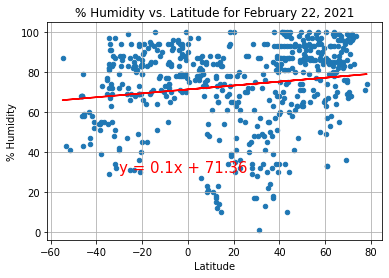

In [12]:
# Humidity (%) vs. Latitude
title = f'% Humidity vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = wx_df['lat']
y_values = wx_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,30), fontsize=15,color='red')

plt.savefig('../output_data/humid v lat')

plt.show()

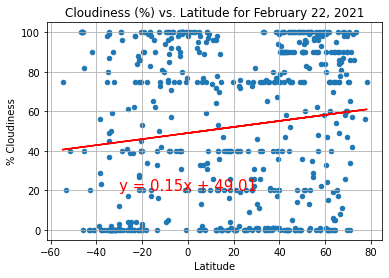

In [13]:
# Cloudiness (%) vs Latitude
title = f'Cloudiness (%) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = wx_df['lat']
y_values = wx_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,20), fontsize=15, color='red')

plt.savefig('../output_data/cloud v lat')


plt.show()

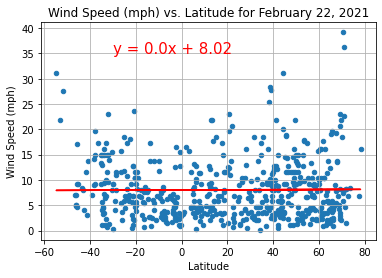

In [14]:
# Wind Speed (mph) vs. Latitude
title = f'Wind Speed (mph) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = wx_df['lat']
y_values = wx_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,35), fontsize=15, color='red')

plt.savefig('../output_data/wind v lat')

plt.show()

In [15]:
# Inspect the data and remove the cities where the humidity > 100%.
#high_humid_df = wx_df[wx_df['humidity'] > 80]
#high_humid_df

wx_df = wx_df[wx_df['humidity'] < 101]
wx_df
## Skip this step if there are no cities that have humidity > 100%.

,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
City,,,,,,,,,
Chokurdakh,RU,2126123,147.9167,70.6333,-34.26,-34.26,83,34,7.45
Abu Dhabi,AE,292968,54.3667,24.4667,70.83,71.60,78,0,5.75
Vaini,TO,4032243,-175.2000,-21.2000,82.40,82.40,69,20,12.66
Forsytheganj,BY,10722858,29.7333,52.6333,33.48,33.48,97,100,2.21
Ushuaia,AR,3833367,-68.3000,-54.8000,42.80,42.80,87,75,31.07
...,...,...,...,...,...,...,...,...,...
San Rafael,AR,3836669,-68.3301,-34.6177,73.09,73.09,29,0,5.64
Ifanadiana,MG,1064366,47.6333,-21.3000,69.57,69.57,93,27,1.16
Santa Cruz de la Sierra,BO,3904906,-63.1667,-17.8000,79.92,80.60,83,75,8.05


In [16]:
wx_df.count


<bound method DataFrame.count of                         Country   City ID       lon      lat  temperature  \
City                                                                        
Chokurdakh                   RU   2126123  147.9167  70.6333       -34.26   
Abu Dhabi                    AE    292968   54.3667  24.4667        70.83   
Vaini                        TO   4032243 -175.2000 -21.2000        82.40   
Forsytheganj                 BY  10722858   29.7333  52.6333        33.48   
Ushuaia                      AR   3833367  -68.3000 -54.8000        42.80   
...                         ...       ...       ...      ...          ...   
San Rafael                   AR   3836669  -68.3301 -34.6177        73.09   
Ifanadiana                   MG   1064366   47.6333 -21.3000        69.57   
Santa Cruz de la Sierra      BO   3904906  -63.1667 -17.8000        79.92   
Vestmannaeyjar               IS   3412093  -20.2734  63.4427        38.70   
Gamba                        GA   2400547  

In [17]:
# Run Linear Regression on each relationship.
# Separate the plots int Northern Hemi (>=0 degrees lat) and 
north_df = wx_df[wx_df['lat'] >= 0]
north_df

,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
City,,,,,,,,,
Chokurdakh,RU,2126123,147.9167,70.6333,-34.26,-34.26,83,34,7.45
Abu Dhabi,AE,292968,54.3667,24.4667,70.83,71.60,78,0,5.75
Forsytheganj,BY,10722858,29.7333,52.6333,33.48,33.48,97,100,2.21
Jamestown,US,5122534,-79.2353,42.0970,30.20,32.00,93,90,14.97
Pochutla,MX,3517970,-96.4661,15.7432,84.09,84.20,54,20,6.91
...,...,...,...,...,...,...,...,...,...
Gambēla,ET,337405,34.5833,8.2500,78.39,78.39,49,31,1.83
Port Hardy,CA,6111862,-127.4199,50.6996,42.80,42.80,87,75,11.50
Tianpeng,CN,1792916,103.9393,30.9866,59.77,61.00,1,11,2.62


In [18]:
# Southern Hemi ( < 0 degrees lat)
south_df = wx_df[wx_df['lat'] < 0]
south_df.count


<bound method DataFrame.count of                         Country  City ID       lon      lat  temperature  \
City                                                                       
Vaini                        TO  4032243 -175.2000 -21.2000        82.40   
Ushuaia                      AR  3833367  -68.3000 -54.8000        42.80   
Mayumba                      GA  2399001   10.6554  -3.4320        78.12   
Rikitea                      PF  4030556 -134.9692 -23.1203        79.74   
Bluff                        NZ  2206939  168.3333 -46.6000        66.99   
...                         ...      ...       ...      ...          ...   
Alofi                        NU  4036284 -169.9187 -19.0595        73.40   
San Rafael                   AR  3836669  -68.3301 -34.6177        73.09   
Ifanadiana                   MG  1064366   47.6333 -21.3000        69.57   
Santa Cruz de la Sierra      BO  3904906  -63.1667 -17.8000        79.92   
Gamba                        GA  2400547   10.0000  -2.

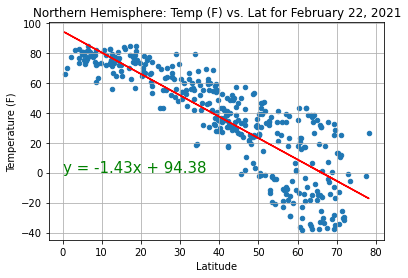

In [19]:
# Northern Hemisphere
# Temperature (F) vs. Latitude

title = f'Northern Hemisphere: Temp (F) vs. Lat for {today}'
north_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = north_df['lat']
y_values = north_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,0), fontsize=15, color='green')

plt.savefig('../output_data/northern hemi temp v lat')

plt.show()


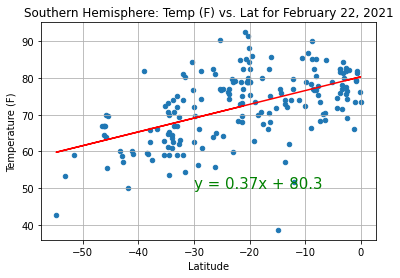

In [22]:
# Southern Hemisphere
# Temperature (F) vs. Latitude

title = f'Southern Hemisphere: Temp (F) vs. Lat for {today}'
south_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = south_df['lat']
y_values = south_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,50), fontsize=15, color='green')

plt.savefig('../output_data/southern hemi temp v lat')

plt.show()

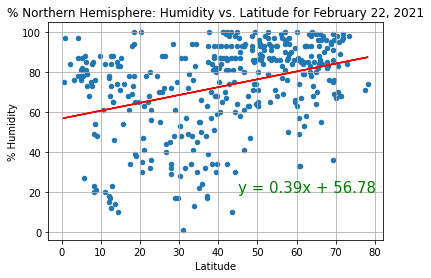

In [23]:
# Northern Hemisphere: Humidity (%) vs. Latitude
title = f'% Northern Hemisphere: Humidity vs. Latitude for {today}'
north_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = north_df['lat']
y_values = north_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(45,20), fontsize=15,color='green')

plt.savefig('../output_data/northern hemi humid v lat')

plt.show()

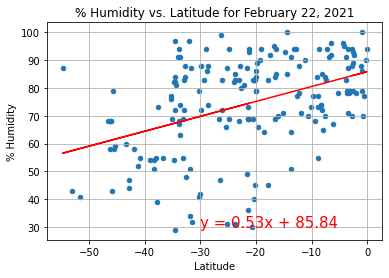

In [24]:
# Southern Hemiphere Humidity (%) vs. Latitude
title = f'% Humidity vs. Latitude for {today}'
south_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = south_df['lat']
y_values = south_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,30), fontsize=15,color='red')

plt.savefig('../output_data/southern hemi humid v lat')

plt.show()

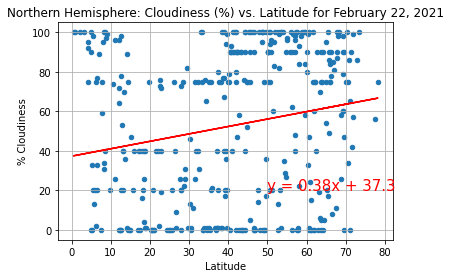

In [25]:
# Northern Hemisphere: Cloudiness (%) vs Latitude
title = f'Northern Hemisphere: Cloudiness (%) vs. Latitude for {today}'
north_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = north_df['lat']
y_values = north_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(50,20), fontsize=15, color='red')

plt.savefig('../output_data/northern hemi cloud v lat')

plt.show()

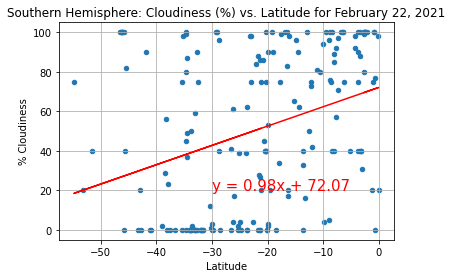

In [26]:
# Southern Hemisphere: Cloudiness (%) vs Latitude
title = f'Southern Hemisphere: Cloudiness (%) vs. Latitude for {today}'
south_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = south_df['lat']
y_values = south_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,20), fontsize=15, color='red')

plt.savefig('../output_data/southern hemi cloud v lat')

plt.show()

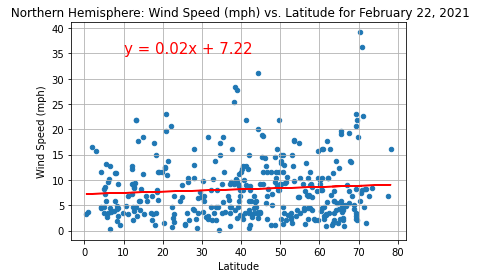

In [27]:
# Northern Hemisphere: Wind Speed (mph) vs. Latitude
title = f' Northern Hemisphere: Wind Speed (mph) vs. Latitude for {today}'
north_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = north_df['lat']
y_values = north_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(10,35), fontsize=15, color='red')

plt.savefig('../output_data/northern hemi wind v lat')

plt.show()

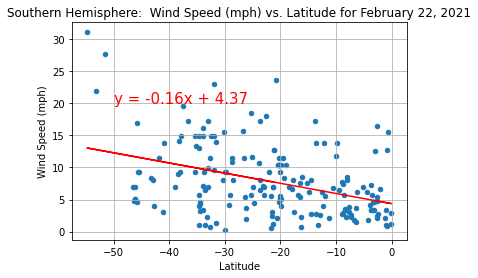

In [28]:
# Southern Hemisphere: Wind Speed (mph) vs. Latitude
title = f'Southern Hemisphere:  Wind Speed (mph) vs. Latitude for {today}'
south_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = south_df['lat']
y_values = south_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-50,20), fontsize=15, color='red')

plt.savefig('../output_data/southern hemi wind v lat')

plt.show()

In [ ]:
## Save the plotted figures as .pngs.